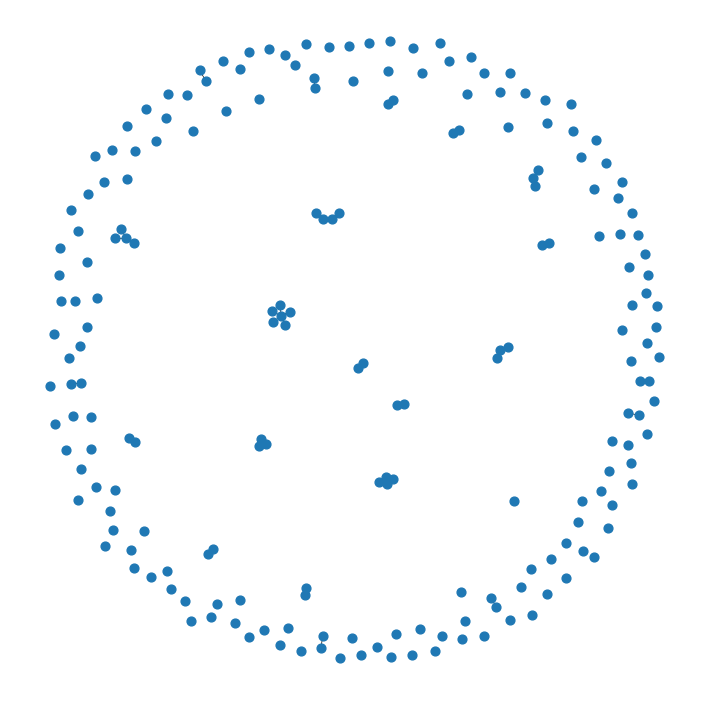

In [2]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data

# 1) Cora データ読み込み
dataset = Planetoid(root="data/Cora", name="Cora")
data = dataset[0]

# 2) 先頭 200 ノードだけ使う
n_nodes = 200
mask = torch.arange(data.num_nodes) < n_nodes

# エッジの抽出
src, dst = data.edge_index
keep = mask[src] & mask[dst]
edge_index_sub = data.edge_index[:, keep]

# 3) NetworkX へ変換
data_sub = Data(x=data.x[mask], edge_index=edge_index_sub)
G = to_networkx(data_sub, to_undirected=True)

# 4) 図示
plt.figure(figsize=(7, 7))
pos = nx.spring_layout(G, seed=0)
nx.draw(G, pos, node_size=40, width=0.5)
plt.show()
